<a href="https://colab.research.google.com/github/avihan-oss/Lotka-Volterra-Simulation/blob/main/Predator_Prey_Dynamics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# Importing Libraries :
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Loading directly from the raw URL
url = "https://raw.githubusercontent.com/stan-dev/example-models/master/knitr/lotka-volterra/hudson-bay-lynx-hare.csv"
df = pd.read_csv(url, comment='#')
df.columns = ['Year', 'Lynx', 'Hare']  # Rename for clarity

# Define t_data and hare_data for the later cells to work
t_data = df['Year']
hare_data = df['Hare']
lynx_data = df['Lynx']

print("Data loaded successfully!")
print(df.head())

Data loaded successfully!
   Year  Lynx  Hare
0  1900   4.0  30.0
1  1901   6.1  47.2
2  1902   9.8  70.2
3  1903  35.2  77.4
4  1904  59.4  36.3


In [69]:
# The Lotka-Volterra Equations (Predator-Prey)
def lotka_volterra(y, t, alpha, beta, delta, gamma):
    H, L = y  # H = Hares (Prey), L = Lynx (Predators)

    # dH/dt = (Growth of Hares) - (Death by Lynx)
    dH_dt = alpha * H - beta * H * L

    # dL/dt = (Growth by eating Hares) - (Natural Death)
    dL_dt = delta * H * L - gamma * L

    return [dH_dt, dL_dt]


In [70]:
# Initial Conditions from the data (Year 1900 approx)
H0 = 30  # Initial Hares (thousands)
L0 = 4   # Initial Lynx (thousands)
y0 = [H0, L0]

# Time points (years)
t = df['Year']

# Parameters (You can tweak these!)
alpha = 0.55  # Hare birth rate
beta  = 0.028 # Hare death rate (per Lynx)
delta = 0.026 # Lynx reproduction rate (per Hare eaten)
gamma = 0.8   # Lynx death rate

# Solve the equations
solution = odeint(lotka_volterra, y0, t, args=(alpha, beta, delta, gamma))
H_model, L_model = solution.T  # Separate the results


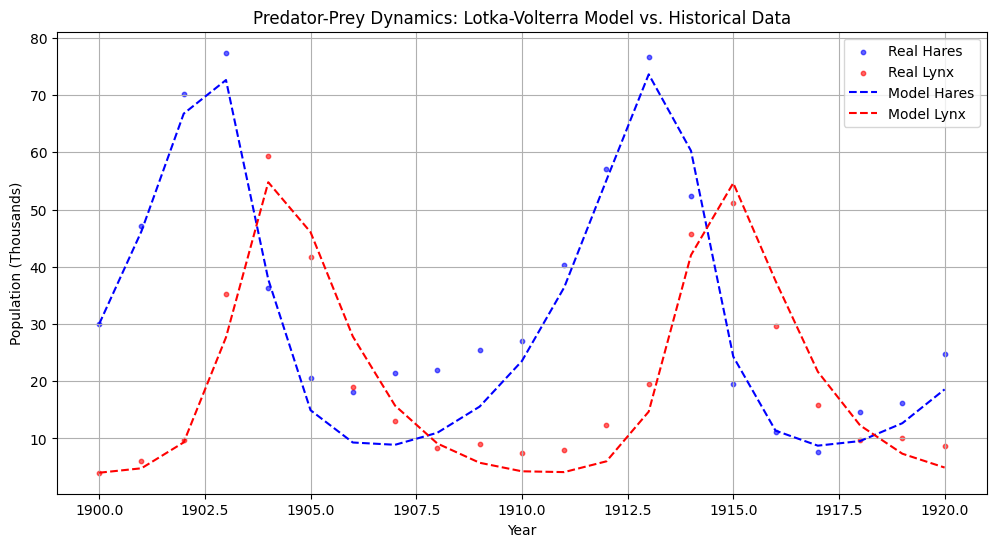

In [71]:
plt.figure(figsize=(12, 6))

# Plot Real Data (Scatter dots)
plt.scatter(df['Year'], df['Hare'], label='Real Hares', color='blue', alpha=0.6, s=10)
plt.scatter(df['Year'], df['Lynx'], label='Real Lynx', color='red', alpha=0.6, s=10)

# Plot Your Model (Smooth lines)
plt.plot(t, H_model, label='Model Hares', color='blue', linestyle='--')
plt.plot(t, L_model, label='Model Lynx', color='red', linestyle='--')

plt.title("Predator-Prey Dynamics: Lotka-Volterra Model vs. Historical Data")
plt.xlabel("Year")
plt.ylabel("Population (Thousands)")
plt.legend()
plt.grid(True)
plt.show()


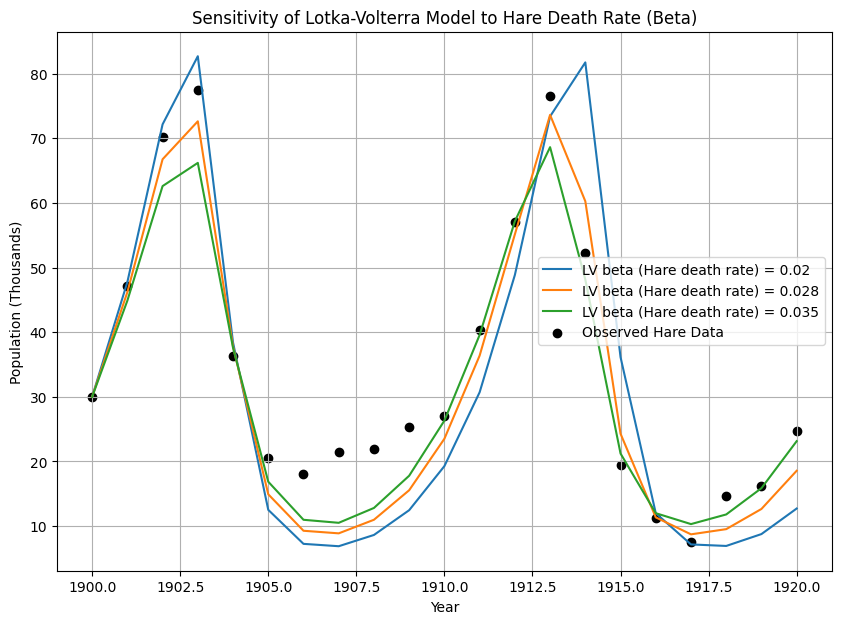

In [72]:
beta_values = [0.02, 0.028, 0.035] # Adjusting these values to be more relevant for Lotka-Volterra's beta parameter

plt.figure(figsize=(10,7))

for b_lv in beta_values: # Renaming 'b' to 'b_lv' for clarity, as it's now a Lotka-Volterra parameter
    # Solve Lotka-Volterra with varying beta (hare death rate by lynx)
    sol = odeint(lotka_volterra, y0, t_data, args=(alpha, b_lv, delta, gamma))

    # Plot Hares (sol[:,0]) as we are varying a parameter affecting them
    plt.plot(t_data, sol[:,0], label=f"LV beta (Hare death rate) = {b_lv}")

plt.scatter(t_data, hare_data, color='black', label="Observed Hare Data")

plt.xlabel("Year")
plt.ylabel("Population (Thousands)")
plt.title("Sensitivity of Lotka-Volterra Model to Hare Death Rate (Beta)")
plt.legend()
plt.grid(True)
plt.show()